# Lab Segmentation 2

In [1]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

<h1 style="color:purple">Experiment 1</h1>

In [52]:
def getThreshold(image):
    # convert to uint8
    image = image if(image.dtype=='uint8')else np.array(image*255,dtype= np.uint8);

    # get histogram 
    freq, glevel = histogram(image)
    
    #Get initial threshold
    size = image.shape[0] * image.shape[1]
    Tinit = round(np.sum( np.multiply(freq, glevel) ) / size)

    #get the two weighted averages (means)
    Tlow = round(np.sum(freq[glevel < Tinit] * glevel[glevel < Tinit]) / np.sum(freq[glevel < Tinit]))
    Thigh= round(np.sum(freq[glevel > Tinit] * glevel[glevel > Tinit]) / np.sum(freq[glevel > Tinit]))
    
    #Update the New threshold to be the average of the two means. 
    Tnew = round((Tlow + Thigh) / 2)

    #Repeat till it converges.
    while(Tnew != Tinit):
        Tinit = Tnew
        Tlow = round(np.sum(freq[glevel < Tinit] * glevel[glevel < Tinit] )/np.sum(freq[glevel < Tinit]))
        Thigh= round(np.sum(freq[glevel > Tinit] * glevel[glevel > Tinit] )/np.sum(freq[glevel > Tinit]))
    
        Tnew = round((Tlow + Thigh) / 2)
        # print(Tnew)
    
    return(Tnew)
    
    

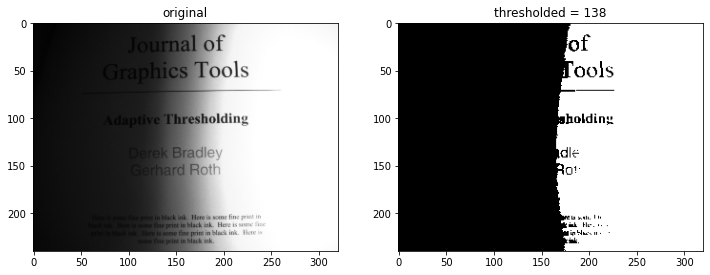

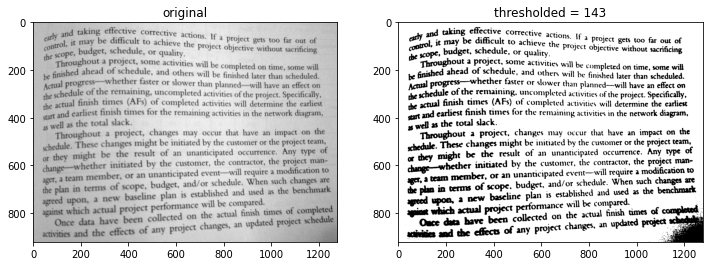

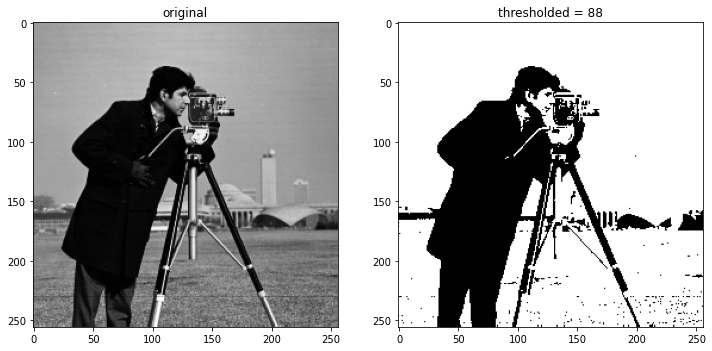

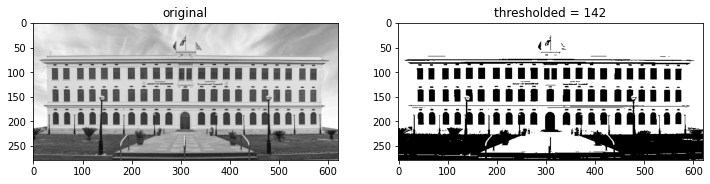

In [53]:

book = io.imread('book.png',as_gray = True)
threshold =getThreshold(book)
show_images([book,book > threshold],["original","thresholded = "+str(threshold)])

book1 = io.imread('book1.png',as_gray = True)
threshold =getThreshold(book1)
# Divide the threshold by 255 since the image values from (0 to 1) data type isn't unit8 , so convert it to compare with the threshold.
show_images([book1,book1 > threshold/255],["original","thresholded = "+str(threshold)])

cameraman = io.imread('cameraman.png',as_gray = True)
threshold =getThreshold(cameraman)
show_images([cameraman,cameraman > threshold],["original","thresholded = "+str(threshold)])

# Divide the threshold by 255 since the image values from (0 to 1) data type isn't unit8 , so convert it to compare with the threshold.
cufe = io.imread('cufe.png',as_gray = True)
threshold =getThreshold(cufe)
show_images([cufe,cufe > threshold/255],["original","thresholded = "+str(threshold)])



<h1 style="color:purple">Experiment 2</h1>

images after divide to 4 quarters


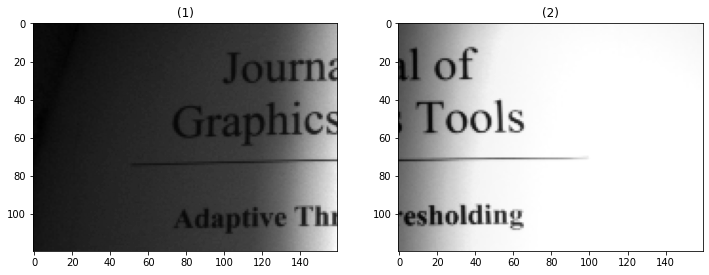

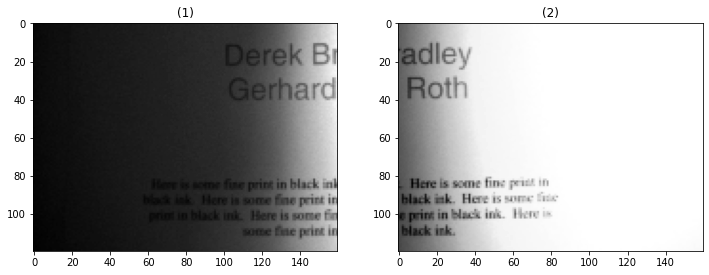

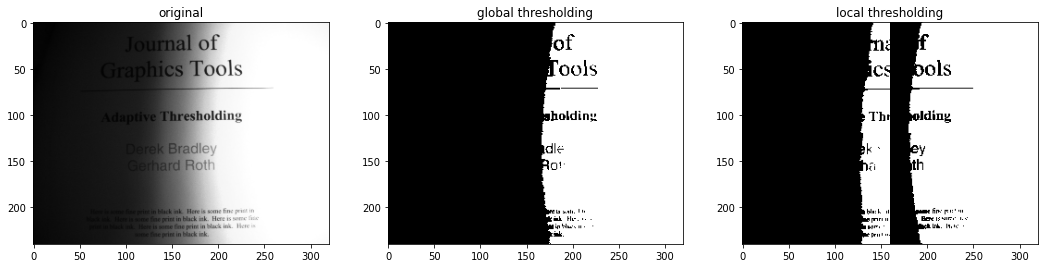

In [84]:
book = io.imread('book.png',as_gray = True)

# applying global thresholding
threshold =getThreshold(book)
book_thresholded = book > threshold

# applying local thresholding
half_length =  int(book.shape[1]/2)
half_width  =  int(book.shape[0]/2)

print("images after divide to 4 quarters")

top_left_quarter = book[0:half_width,0:half_length]
top_right_quarter = book[0:half_width,half_length:]
down_left_quarter = book[half_width:,0:half_length]
down_right_quarter = book[half_width:,half_length:]

show_images([top_left_quarter,top_right_quarter])
show_images([down_left_quarter,down_right_quarter])

top_left_thresholded  = top_left_quarter >getThreshold(top_left_quarter)
top_right_thresholded = top_right_quarter>getThreshold(top_right_quarter)
down_left_thresholded = down_left_quarter>getThreshold(down_left_quarter)
down_right_thresholded= down_right_quarter>getThreshold(down_right_quarter)

thresholded = np.block([[top_left_thresholded,top_right_thresholded],[down_left_thresholded,down_right_thresholded]])
show_images([book,book_thresholded,thresholded],['original','global thresholding','local thresholding'])


<h1 style="color:purple">Experiment 3 (Bonus):</h1>

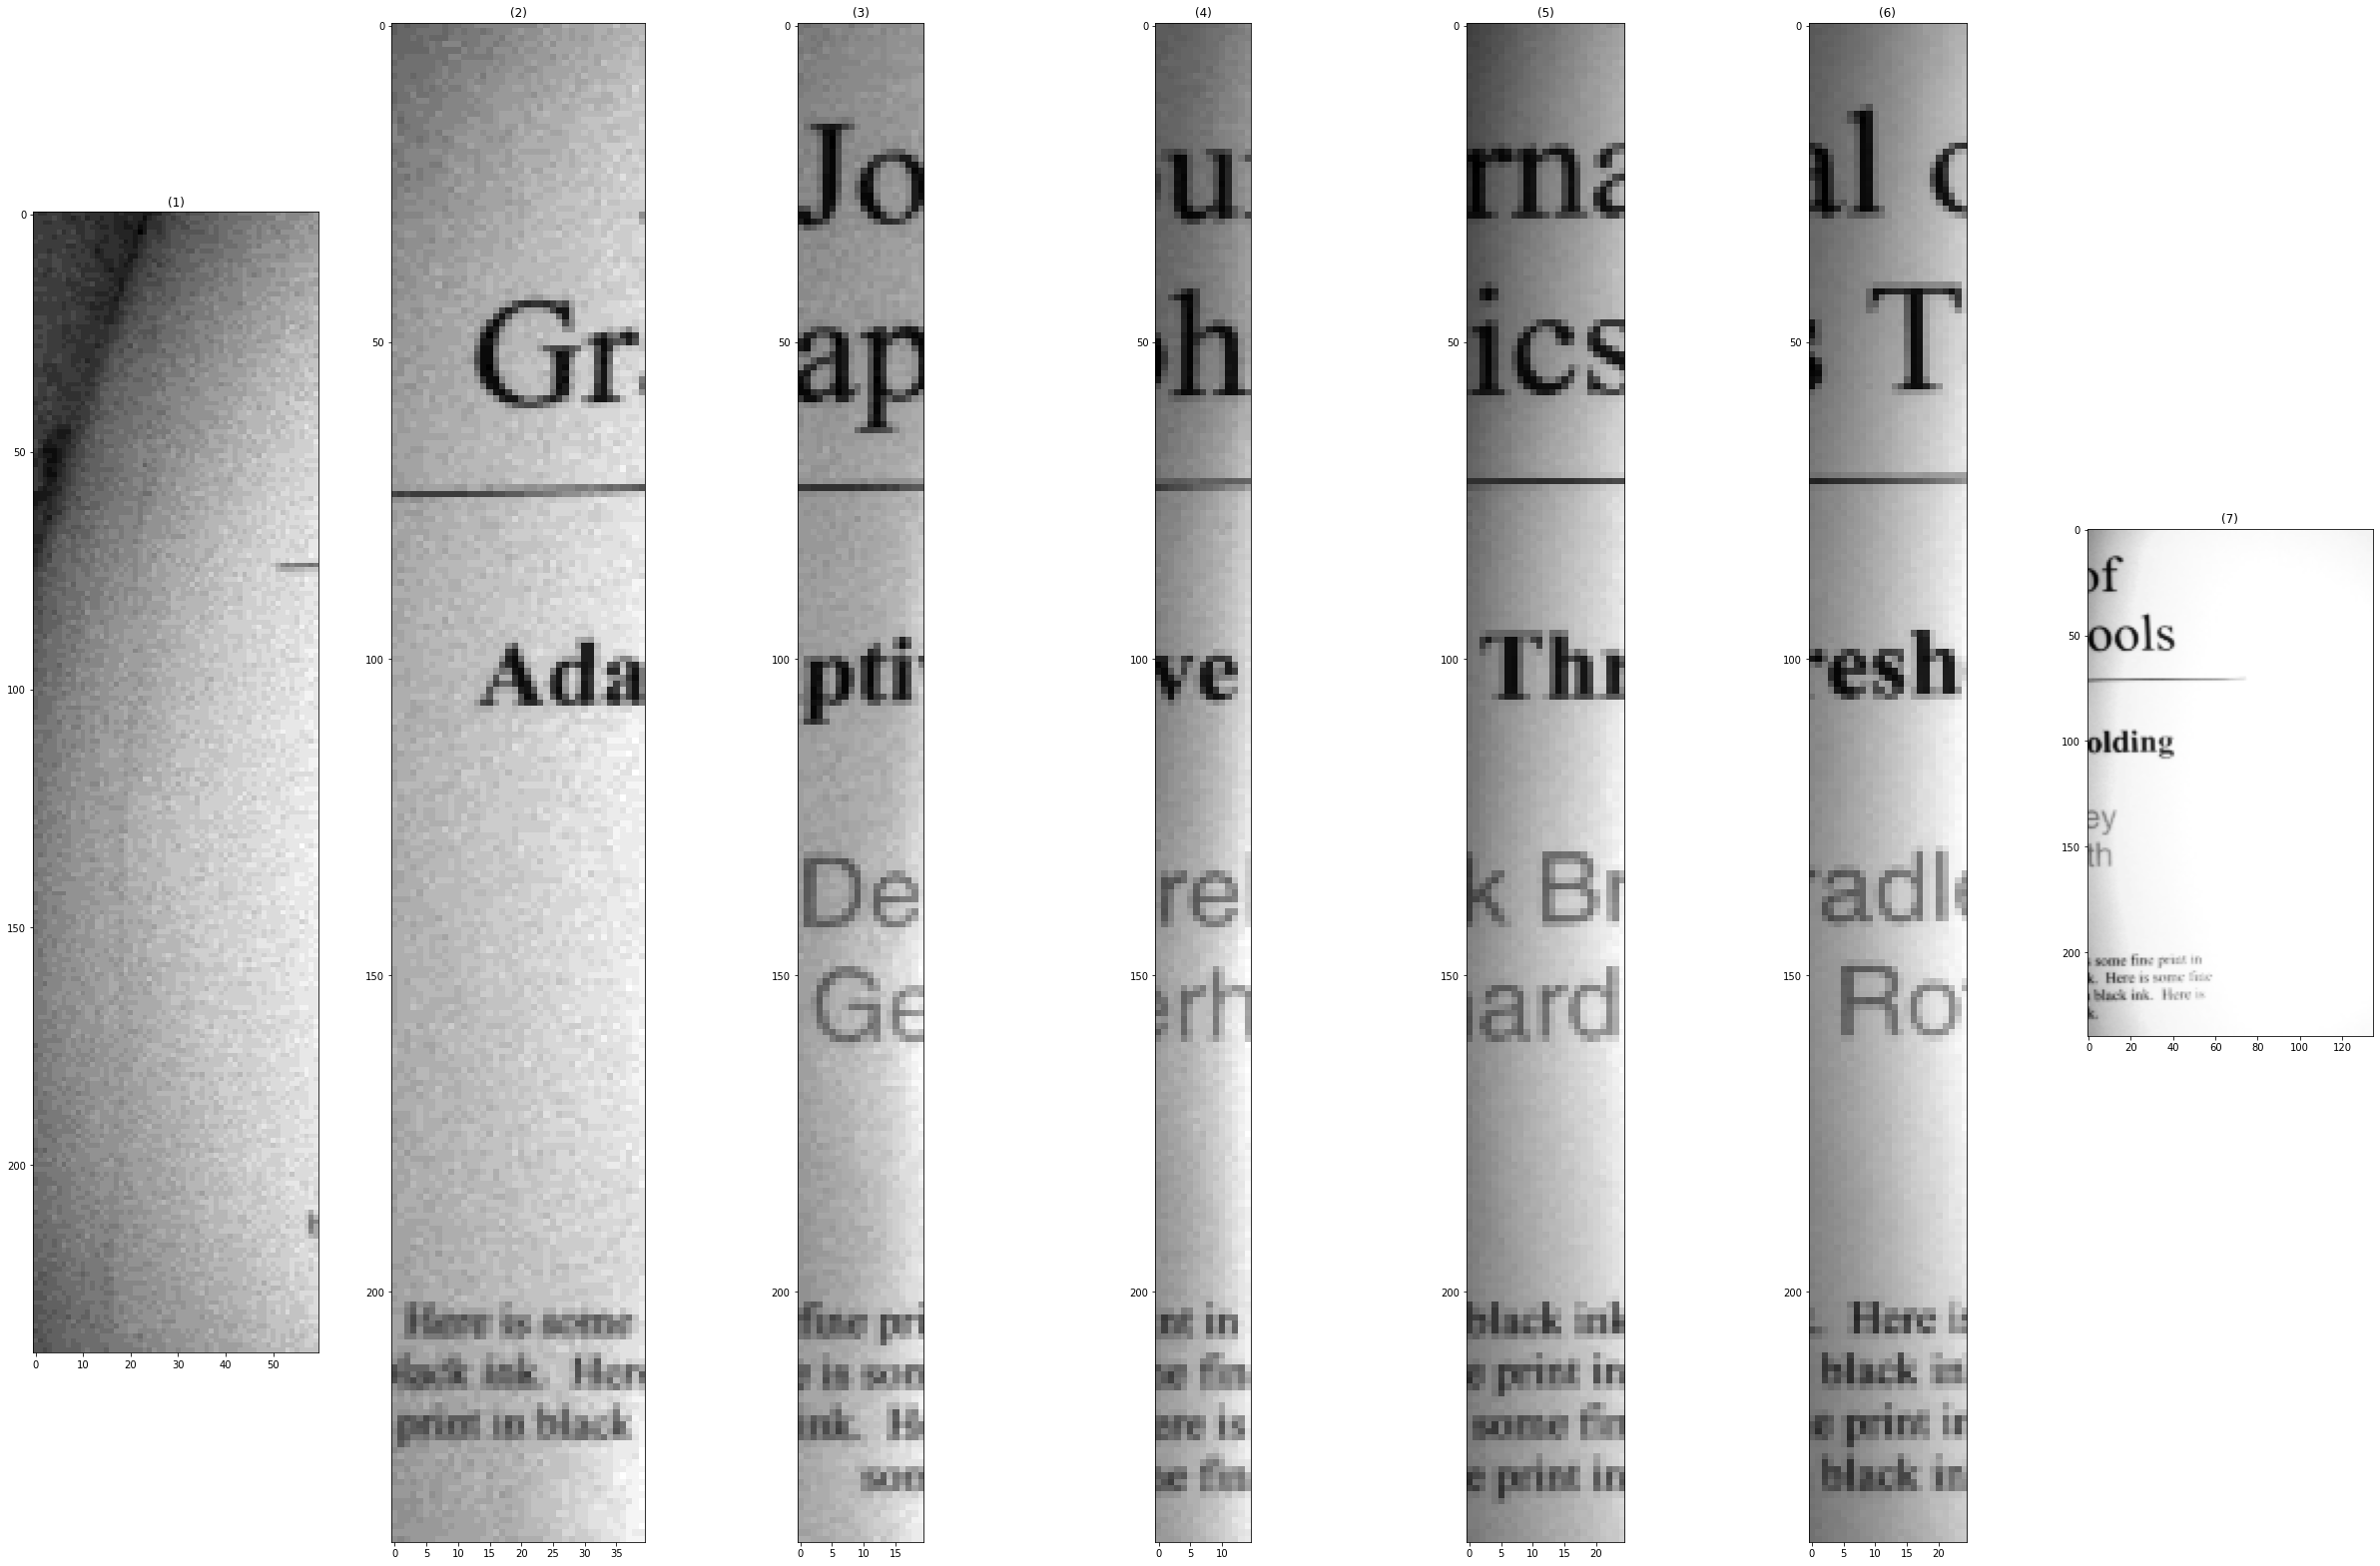

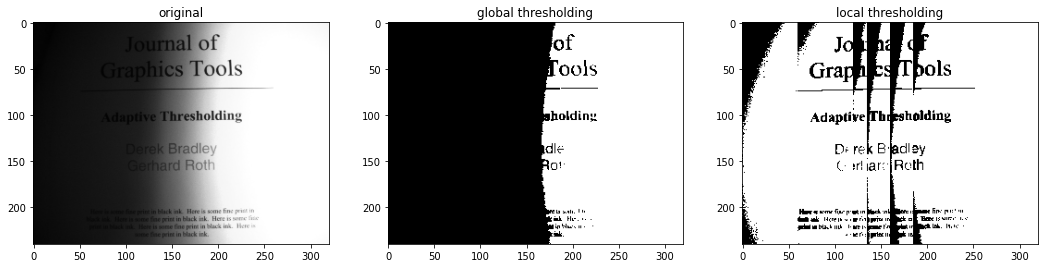

In [307]:
from skimage import exposure , morphology

# First will divide the image into vertical regions 
region0 = book[:,0:60]
region1 = book[:,60:100]
region2 = book[:,100:120]
region3i = book[:,120:135]
region3ii = book[:,135:160]
region4 = book[:,160:185]
region5 = book[:,185:]
show_images([region0,region1,region2,region3i,region3ii,region4,region5])


# will apply gamma correction to correct the brightness of the subimage
region0_brighted = exposure.adjust_gamma(region0,0.01)
region1_brighted = exposure.adjust_gamma(region1,0.2)
region2_brighted = exposure.adjust_gamma(region2,0.5)
region3i_brighted = exposure.adjust_gamma(region3i,0.29)
region3ii_brighted = exposure.adjust_gamma(region3ii,0.39)
region4_brighted = exposure.adjust_gamma(region4,0.48)
region5_brighted = exposure.adjust_gamma(region5,0.83)
thresholded = np.block([[region0_brighted>getThreshold(region0_brighted),region1_brighted > getThreshold(region1_brighted),region2_brighted > getThreshold(region2_brighted),region3i_brighted> getThreshold(region3i_brighted),region3ii_brighted> getThreshold(region3ii_brighted),region4_brighted>getThreshold(region4_brighted),region5 > getThreshold(region5)],])
show_images([book,book_thresholded,thresholded],['original','global thresholding','local thresholding'])
